In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

In [3]:
url = "https://api.coinmarketcap.com/v1/ticker/?limit=10"

In [4]:
data = pd.read_json(url)
df = pd.DataFrame(data)

print(df.head())

   24h_volume_usd  available_supply            id  last_updated  \
0    3.163040e+09          17321000       bitcoin    1539491254   
1    1.160208e+09         102557784      ethereum    1539491263   
2    3.487245e+08       39997634397        ripple    1539491285   
3    2.346359e+08          17401150  bitcoin-cash    1539491252   
4    3.540507e+08         906245118           eos    1539491253   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    109788772565  2.100000e+07       Bitcoin               0.55   
1     20620510425           NaN      Ethereum               0.63   
2     16925023950  1.000000e+11           XRP               0.61   
3      7847549328  2.100000e+07  Bitcoin Cash               0.59   
4      4782477677           NaN           EOS               0.58   

   percent_change_24h  percent_change_7d  price_btc    price_usd  rank symbol  \
0                0.97              -3.80   1.000000  6338.477719     1    BTC   
1                1.35     

In [5]:
import os
os.listdir()

['CryptoCurrencies.ipynb', '.ipynb_checkpoints']

In [6]:
!pwd

/Users/zishuoli/Documents/projects/Cryptocurrencies/notebook


In [11]:
Dec6th2017 = pd.read_csv('../data/coinmarketcap_06122017.csv')

In [13]:
Dec6th2017.head()


Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0    9.007640e+09      1.672352e+07       bitcoin    1512549554   
1           1    1.551330e+09      9.616537e+07      ethereum    1512549553   
2           2    1.111350e+09      1.684044e+07  bitcoin-cash    1512549578   
3           3    2.936090e+09      2.779530e+09          iota    1512549571   
4           4    2.315050e+08      3.873915e+10        ripple    1512549541   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    2.130493e+11  2.100000e+07       Bitcoin               0.12   
1    4.352945e+10           NaN      Ethereum              -0.18   
2    2.529585e+10  2.100000e+07  Bitcoin Cash               1.65   
3    1.475225e+10  2.779530e+09          IOTA              -2.38   
4    9.365343e+09  1.000000e+11        Ripple               0.56   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                7.33              17.45   1.000000  12739.500000     1   
1               -3.93              -7.33   0.036177    452.652000     2   
2               -5.51              -4.75   0.120050   1502.090000     3   
3               83.35             255.82   0.000424      5.307460     4   
4               -3.70             -14.79   0.000019      0.241754     5   

  symbol  total_supply  
0    BTC  1.672352e+07  
1    ETH  9.616537e+07  
2    BCH  1.684044e+07  
3  MIOTA  2.779530e+09  
4    XRP  9.999309e+10

In [15]:
market_cap_raw = Dec6th2017[['id','market_cap_usd']]
(market_cap_raw.head())

id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10
4        ripple    9.365343e+09

In [16]:
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [17]:
print(Dec6th2017.head())

   Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0    9.007640e+09      1.672352e+07       bitcoin    1512549554   
1           1    1.551330e+09      9.616537e+07      ethereum    1512549553   
2           2    1.111350e+09      1.684044e+07  bitcoin-cash    1512549578   
3           3    2.936090e+09      2.779530e+09          iota    1512549571   
4           4    2.315050e+08      3.873915e+10        ripple    1512549541   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    2.130493e+11  2.100000e+07       Bitcoin               0.12   
1    4.352945e+10           NaN      Ethereum              -0.18   
2    2.529585e+10  2.100000e+07  Bitcoin Cash               1.65   
3    1.475225e+10  2.779530e+09          IOTA              -2.38   
4    9.365343e+09  1.000000e+11        Ripple               0.56   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \
0                7.33              17.45 

In [18]:
cap = market_cap_raw.query('market_cap_usd > 0')

In [21]:
cap.head()
print(cap.count())

id                1031
market_cap_usd    1031
dtype: int64


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


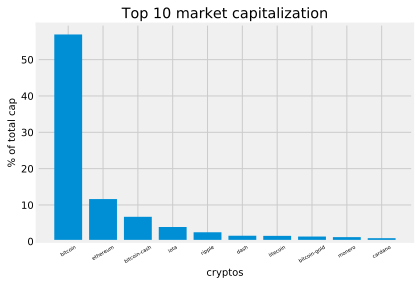

In [28]:
cap10 = cap.head(10)
total_market_cap = cap.loc[:,'market_cap_usd']
labels = cap10.loc[:,'id']
totalcap = total_market_cap.values.sum()

cap10['market_percentage'] = (cap10.market_cap_usd / totalcap)*100
market_percentage = cap10.loc[:,'market_percentage']

#Plot
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

plt.bar(labels,market_percentage)
plt.xlabel('cryptos',fontsize=10)
plt.title(TOP_CAP_TITLE)
plt.xticks(fontsize=5,rotation=30)

plt.ylabel(TOP_CAP_YLABEL,fontsize=10)

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


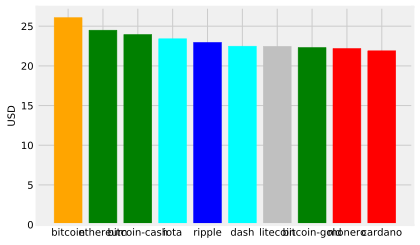

In [29]:
#Colors
COLORS = ['orange','green','cyan','blue','silver','red']

cap10['market_cap_log'] = np.log(cap10.loc[:,'market_cap_usd'])
cap10.head(10)
market_cap_log = cap10.loc[:,'market_cap_log']

barlist = plt.bar(labels,market_cap_log)
barlist[0].set_color(COLORS[0])
barlist[1].set_color(COLORS[1])
barlist[2].set_color(COLORS[1])
barlist[3].set_color(COLORS[2])
barlist[4].set_color(COLORS[3])
barlist[5].set_color(COLORS[2])
barlist[6].set_color(COLORS[4])
barlist[7].set_color(COLORS[1])
barlist[8].set_color(COLORS[5])
barlist[9].set_color(COLORS[5])

plt.ylabel('USD',fontsize=10)
plt.show()

In [118]:
market_id_24h_7d = Dec6th2017[['id','percent_change_24h','percent_change_7d','market_cap_usd']]

Volatility_Series = Dec6th2017[['id','percent_change_24h','percent_change_7d','market_cap_usd']]

market_id_24h_7d.set_index('id',inplace=True)

market_id_24h_7d = market_id_24h_7d.query('market_cap_usd > 0')
market_id_24h_7d.head(10)

y_Series = market_id_24h_7d.sort_values('percent_change_7d')

print(y_Series.head(10))




                                 percent_change_24h  percent_change_7d  \
id                                                                       
credence-coin                                -94.22             -95.31   
cagecoin                                     -36.26             -92.68   
electra                                      -40.59             -81.29   
jetcoin                                      -36.03             -80.66   
ether-for-the-rest-of-the-world               -3.05             -75.03   
leviarcoin                                   -47.57             -71.70   
falcoin                                        0.99             -71.64   
zeitcoin                                     -24.90             -70.27   
ecocoin                                      -10.16             -66.91   
ulatech                                       29.06             -64.39   

                                 market_cap_usd  
id                                               
credence-co

AttributeError: module 'matplotlib.pyplot' has no attribute 'y_Series'

In [102]:
def top10_subplot(volatility_series, title, sortedBy):
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    
    
    percent_change_descending = volatility_series.sort_values(sortedBy, ascending=False)
    
    percent_change_losers = volatility_series.loc[:,sortedBy].head(10)
    percent_change_winners = percent_change_descending.loc[:,sortedBy].head(10)
    
    labels_ascending = volatility_series.loc[:,'id'].head(10)
    labels_descending = percent_change_descending.loc[:,'id'].head(10)
        
    axes[0].bar(labels_descending,percent_change_winners)
    axes[0].set_title("Winners")
    axes[0].set_ylabel("Market Capital Usd")
    axes[0].set_xlabel("winners",size = 10)
    
    axes[1].bar(labels_ascending, percent_change_losers)
    axes[1].set_title("losers")
    axes[1].set_ylabel("Market Capital Usd")
    axes[1].set_xlabel("Losers",size = 10)
    
    return fig,axes









In [103]:

DTITLE = "24 hours top losers and winners"
sortedBy = "percent_change_24h"


In [104]:
percentChange24h = Volatility_Series.sort_values('percent_change_24h')


(<Figure size 720x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1182d2e48>,
       dtype=object))

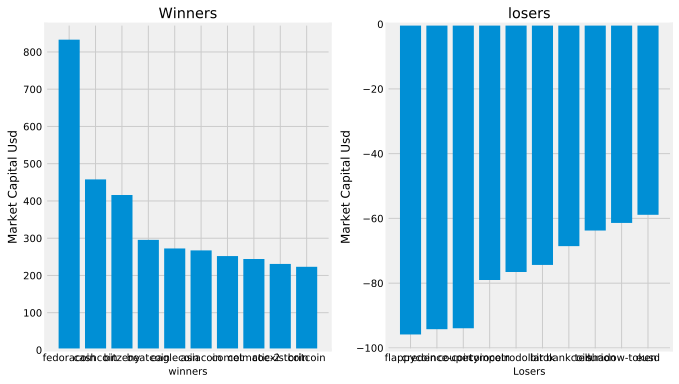

In [105]:

top10_subplot(percentChange24h,DTITLE,sortedBy)

                                   id  percent_change_24h  percent_change_7d  \
1101                        royalties               -9.06             -99.59   
1246                       flappycoin              -95.85             -96.61   
613                     credence-coin              -94.22             -95.31   
903                          cagecoin              -36.26             -92.68   
1319                         tyrocoin              -79.02             -87.43   
922                           electra              -40.59             -81.29   
889                           jetcoin              -36.03             -80.66   
1078                           everus              -21.99             -76.86   
904   ether-for-the-rest-of-the-world               -3.05             -75.03   
1182                         landcoin              -52.11             -73.62   
682                        leviarcoin              -47.57             -71.70   
1270                            bitok   

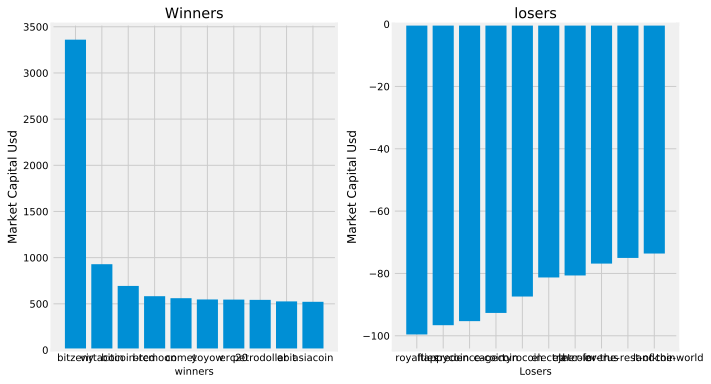

In [119]:
volatility7d = ...

WTITLE = "Weekly top losers and winners"
sortedBy = "percent_change_7d"

percentChange7d = Volatility_Series.sort_values('percent_change_7d')
top10_subplot(percentChange7d,WTITLE,sortedBy)
print(percentChange7d)

In [109]:
largecaps = market_id_24h_7d.query('market_cap_usd >10000000000')
print(largecaps.head(25))

              percent_change_24h  percent_change_7d  market_cap_usd
id                                                                 
bitcoin                     7.33              17.45    2.130493e+11
ethereum                   -3.93              -7.33    4.352945e+10
bitcoin-cash               -5.51              -4.75    2.529585e+10
iota                       83.35             255.82    1.475225e+10


In [115]:
def capcount(query_string):
    return cap.query(query_string).count().id

[10, 17, 1004]


<BarContainer object of 3 artists>

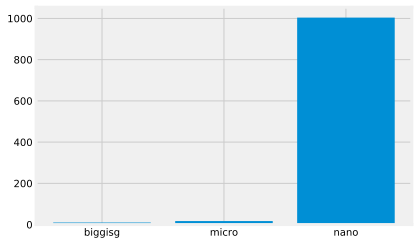

In [117]:
LABELS = ["biggisg","micro","nano"]
biggish = capcount('market_cap_usd > 3000000000')
micro = capcount('market_cap_usd < 3000000000& market_cap_usd >500000000')
nano = capcount('market_cap_usd < 500000000')
values = [biggish,micro,nano]

print(values)
plt.bar(LABELS,values)